<a href="https://colab.research.google.com/github/jittakorn-ch/multivariate/blob/main/Chapter_5_Factor_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.datacamp.com/community/tutorials/introduction-factor-analysis

In [40]:
import pandas as pd

In [41]:
BFI_data = pd.read_csv('/content/bfi.csv')
BFI_data.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


In [42]:
BFI_data.shape

(2800, 29)

 ## factor Analysis' 
 
 ## assumptions:

 ในข้อมูล multivariate ที่มีตัวแปร observe variables จำนวน  n ตัว 
 
 มีตัวแปร factor (Latent variables) จำนวน k ตัว ที่สามารถอธิบายข้อมูลทั้งหมดได้ 
 
 โดย k < n

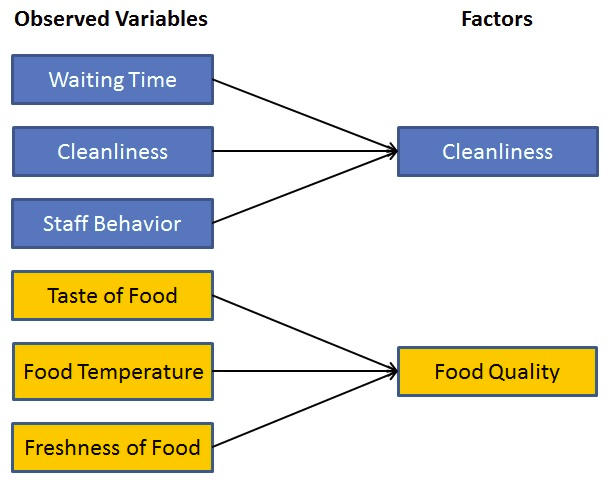

Assumptions ในการทำ Factor Analysis:
- There are no outliers in data.
- Sample size should be greater than the factor.
- There should not be ***perfect multicollinearity***.
- There should not be ***homoscedasticity*** between the variables.

### การทำ Factor Analysis

In [43]:
!pip install factor_analyzer               ### install ทุกครั้ง

## Quiz 5 เลือกข้อมูลมาเแพาะ a1,a2,a3,...,o3,o4,o5 ด้วยคำสั่ง `.iloc[]`

In [44]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt 

In [45]:
BFI_data_dropped = BFI_data.iloc[:,1:26]          ### หรือ  BFI_data.iloc[:,1:-3]
BFI_data_dropped.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


In [46]:
BFI_data_dropped.shape

(2800, 25)

In [47]:
BFI_data_dropped = BFI_data_dropped.dropna()         ###   .dropna ตัดแถวที่ไม่มีข้อมูล
BFI_data_dropped

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2793,3.0,4.0,3.0,1.0,3.0,5.0,4.0,5.0,3.0,4.0,3.0,5.0,2.0,3.0,1.0,5.0,6.0,5.0,5.0,6.0,6.0,1,4.0,5.0,2.0
2794,5.0,5.0,5.0,5.0,3.0,5.0,4.0,2.0,3.0,5.0,3.0,5.0,5.0,6.0,5.0,4.0,5.0,3.0,5.0,2.0,6.0,1,5.0,6.0,2.0
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,2.0,2.0,6.0,3.0,6.0,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,2.0,2.0,4.0,5.0,4.0,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0


 ## Bartlett’s test

 p-value เข้าใกล้ 0 ดี

In [48]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity      ### import function ที่ต้องการใช้งาน

chi_square_value,p_value=calculate_bartlett_sphericity(BFI_data_dropped)        

chi_square_value, p_value

(18170.966350869243, 0.0)

## Kaiser-Meyer-Olkin (KMO) Test

ถ้าค่า KMO model มีค่ามากกว่า 0.6 แปลว่าข้อมูลเหมาะสมที่จะนำไปใช้

In [49]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(BFI_data_dropped)

kmo_model

0.8485397221949221

## Factor Analysis

### Import

In [50]:
from factor_analyzer import FactorAnalyzer

### Define

In [51]:
fa = FactorAnalyzer(n_factors=20)

### Fit-transform

In [52]:
data_fa = fa.fit_transform(BFI_data_dropped)

In [53]:
data_fa.shape

(2436, 20)

### วิธีตัดสินว่าเราจะลดเหลือกกี่ dimension (มี factor ทั้งหมดกี่ตัว)

In [54]:
ev,v = fa.get_eigenvalues()

#### ใช้ eigen values

In [55]:
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

#### scree plot

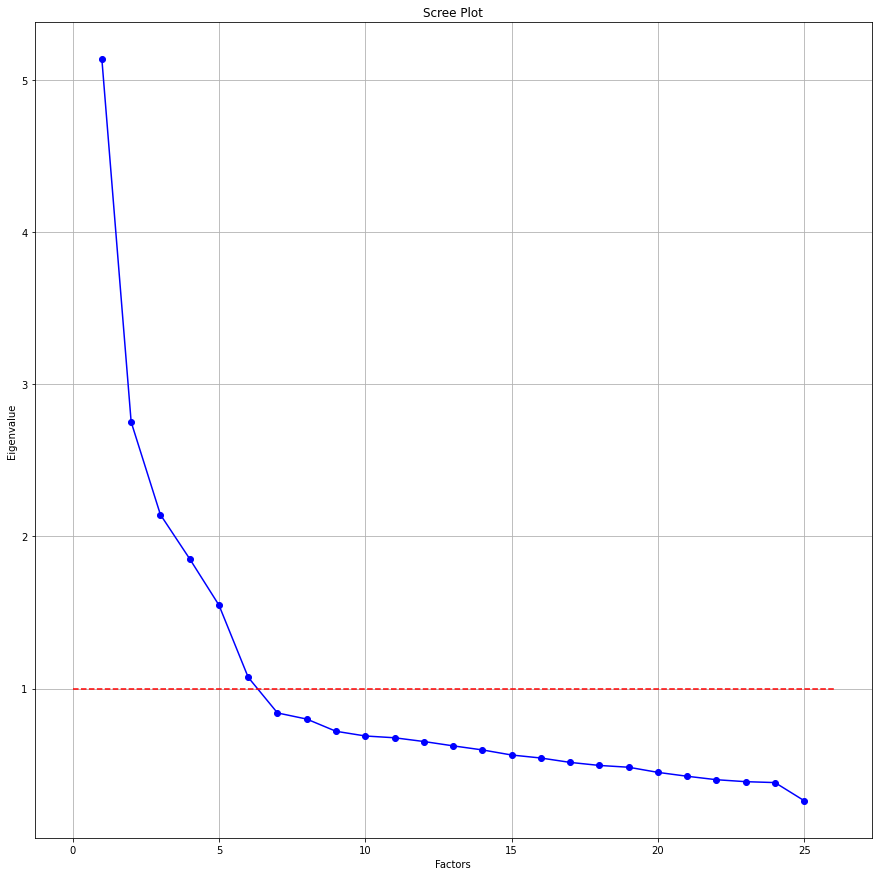

In [56]:
# Create scree plot using matplotlib
plt.plot(range(1,BFI_data_dropped.shape[1]+1),ev,'bo-')
plt.plot([0,BFI_data_dropped.shape[1]+1],[1,1],'r--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [57]:
data_fa[:,:6]

array([[-0.89749661, -0.12809666, -1.22649076,  1.08665889,  0.42476701,
         0.03981611],
       [ 0.33679356, -0.15018138, -0.04332274, -0.10339328,  0.29665648,
        -1.11019718],
       [-0.24521029,  0.80409961,  0.39343377, -0.30106518,  0.82703928,
        -0.2982022 ],
       ...,
       [ 0.38724631, -0.02183587,  1.19616826, -1.19357208,  0.79669501,
        -0.95295109],
       [-0.75695976,  0.94984758,  1.24363484, -1.15230215,  2.2534133 ,
        -1.0218667 ],
       [-2.35583952, -1.49829856,  0.49436981, -1.64734311,  0.94742323,
         0.43462495]])

### รัน Factor Analyzer อีกรอบ ด้วย paremeters จำนวน factor เท่ากับ 6

In [58]:
from factor_analyzer import FactorAnalyzer
fa2 = FactorAnalyzer(n_factors=6)
data_fa2 = fa2.fit_transform(BFI_data_dropped)

In [59]:
fa2.loadings_.shape

(25, 6)

#### Plot factor loadings

In [60]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

### matrix plot

confimatory

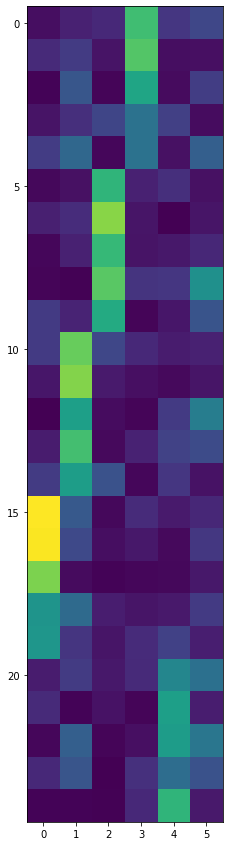

In [61]:
matplotlib.rcParams['figure.figsize']=[15,15]
plt.imshow(np.absolute(fa2.loadings_))

### กราฟแท่ง

Exploratory

In [62]:
BFI_data_dropped.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4',
       'O5'],
      dtype='object')

<BarContainer object of 25 artists>

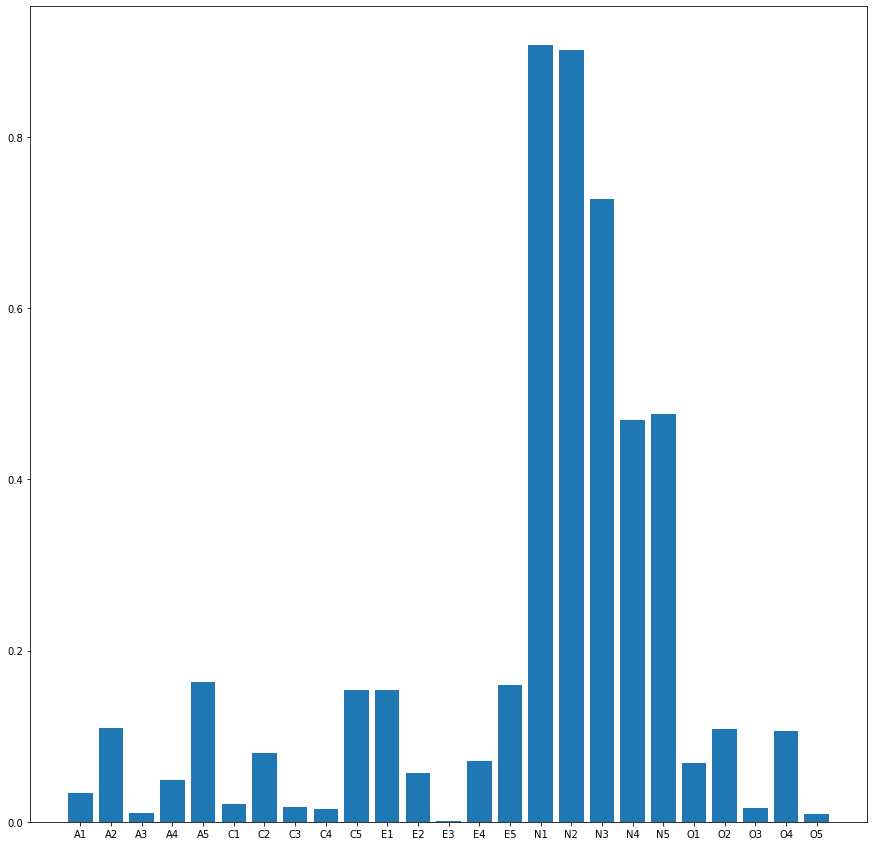

In [63]:
plt.bar(range(25),np.absolute(fa2.loadings_[:,0]),tick_label=BFI_data_dropped.columns)

# Exam 3

ทำ Factor Analysis ข้อมูล Fifa 2018  https://drive.google.com/file/d/1UORRKWMb8GCN455eJE_n9MvBHupnSVwv/view?usp=sharing

In [97]:
import pandas as pd

In [98]:
Fifa_data = pd.read_csv('/content/FIFA 2018 Statistics.csv')
Fifa_data

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,11-07-2018,England,Croatia,1,46,11,1,6,4,4,3,24,5,79,479,148,14,1,0,0,No,5.0,Semi- Finals,No,0,NaN,NaN
124,14-07-2018,Belgium,England,2,43,12,4,3,5,4,1,5,5,88,510,108,11,1,0,0,Yes,4.0,3rd Place,No,0,NaN,NaN
125,14-07-2018,England,Belgium,0,57,15,5,7,3,5,0,12,2,92,698,110,5,2,0,0,No,NaN,3rd Place,No,0,NaN,NaN
126,15-07-2018,France,Croatia,4,39,8,6,1,1,2,1,14,1,75,271,99,14,2,0,0,Yes,18.0,Final,No,0,1.0,18.0


In [66]:
Fifa_data.shape       ### ดูขนาด

(128, 27)

In [67]:
Fifa_data_dropped = Fifa_data.iloc[:,3:-7]       ### เลือกมาเฉพาะข้อมูลที่เป็นตัวเลข
Fifa_data_dropped

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red
0,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0
1,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0
2,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0
3,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0
4,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1,46,11,1,6,4,4,3,24,5,79,479,148,14,1,0,0
124,2,43,12,4,3,5,4,1,5,5,88,510,108,11,1,0,0
125,0,57,15,5,7,3,5,0,12,2,92,698,110,5,2,0,0
126,4,39,8,6,1,1,2,1,14,1,75,271,99,14,2,0,0


In [68]:
Fifa_data_dropped = Fifa_data_dropped.dropna()    ### ตัดแถวที่ไม่มีข้อมูล

In [69]:
Fifa_data_dropped.shape     ### ดูขนาด

(128, 17)

## การทำ Factor Analysis

In [70]:
!pip install factor_analyzer          ###  install package

In [71]:
from factor_analyzer import FactorAnalyzer          ### import function จาก package
import matplotlib.pyplot as plt  

### Bartlett’s test

In [72]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value = calculate_bartlett_sphericity(Fifa_data_dropped)

chi_square_value, p_value

(1299.3697851171412, 2.713580160466225e-189)

p-value เข้าใกล้ 0 แสดงว่า ไม่มี perfect multicollinearity.

### Kaiser-Meyer-Olkin (KMO) Test

In [73]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(Fifa_data_dropped)

kmo_model

0.5594556344508279

ค่า KMO model มีค่าน้อยกว่า 0.6 แปลว่า นำไปใช้ได้แต่แค่ยังไม่เหมาะสม

### ทำ Factor Analysis

Implot

In [104]:
from factor_analyzer import FactorAnalyzer

Define

In [105]:
fa_Fifa = FactorAnalyzer(n_factors=16)

Fit-transform

In [106]:
data_fa_Fifa = fa_Fifa.fit_transform(Fifa_data_dropped)

In [102]:
data_fa_Fifa.shape

(128, 16)

### ตัดสินว่าเราจะลดเหลือกี่ dimension (มี factors ทั้งหมดกี่ตัว)

In [111]:
ev,v = fa_Fifa.get_eigenvalues()

#### ใช้ eigen values

In [112]:
ev

array([4.93533676, 1.66110682, 1.45898601, 1.31857945, 1.27991548,
       1.1607222 , 0.89822418, 0.80740568, 0.78874612, 0.65948826,
       0.56563441, 0.48116939, 0.38549929, 0.29659929, 0.22859409,
       0.06848785, 0.00550471])

### scree plot

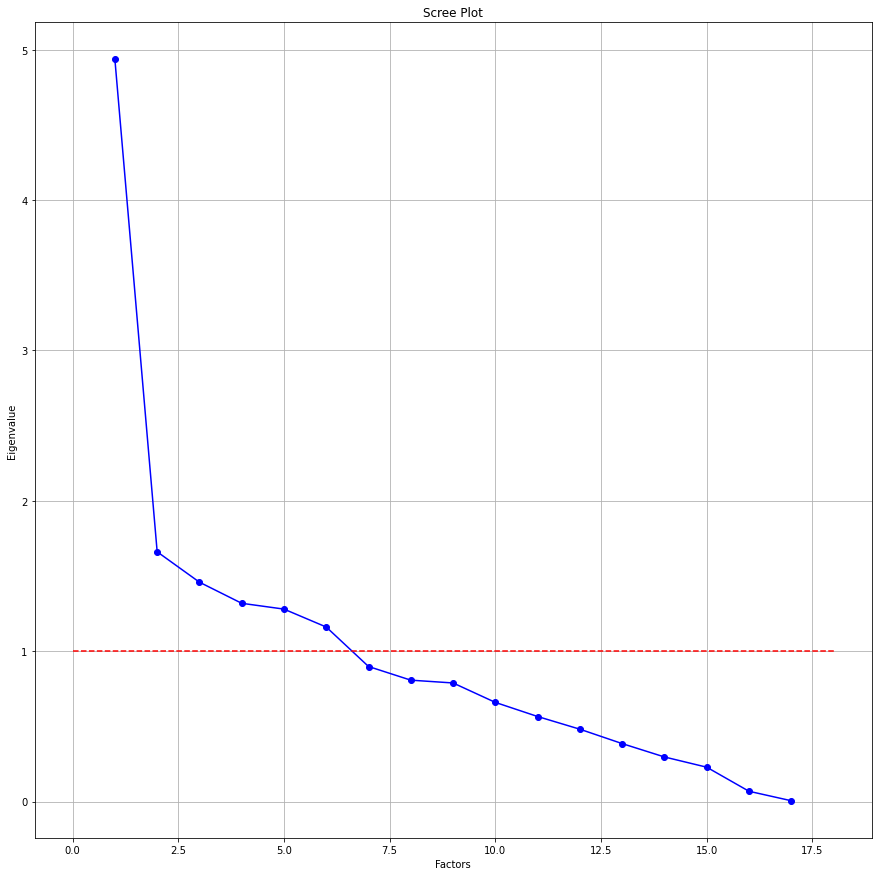

In [113]:
# Create scree plot using matplotlib
plt.plot(range(1,Fifa_data_dropped.shape[1]+1),ev,'bo-')
plt.plot([0,Fifa_data_dropped.shape[1]+1],[1,1],'r--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

มีทั้งหมด 6 Factors ที่มีค่า Eigenvalue มากกว่า 1

In [114]:
data_fa_Fifa[:,:6]

array([[-1.02852235e+00,  6.84121245e-01,  2.62286805e+00,
        -6.13275893e-02, -5.44092674e-02,  2.00934276e-01],
       [ 7.27448293e-01, -5.24186679e-01, -1.07869132e+00,
        -8.50925779e-01, -2.41176630e-01,  2.50883401e-01],
       [-6.45675050e-01,  1.82115619e-01, -5.69637077e-01,
         2.26028940e-01,  3.37982843e-02, -1.68147976e-01],
       [ 7.47704941e-01,  1.72940207e-01, -2.02499240e-01,
        -1.29479087e+00, -1.29504953e-01, -5.66581441e-02],
       [ 7.64590473e-01, -1.02338004e+00, -2.54183776e-01,
         6.17252933e-01,  1.72354639e-01,  2.04944359e-01],
       [-1.37927654e+00, -1.02367999e+00, -1.18075480e-01,
         9.43416646e-01, -7.19004216e-01, -5.47973852e-01],
       [-7.75361184e-01, -5.36622975e-01,  8.32824491e-01,
        -2.23469488e-01,  1.60618514e-01, -8.09773397e-02],
       [ 1.44271720e+00, -9.83264072e-02,  1.09942840e+00,
        -5.21200358e-01, -4.13879311e-01,  9.66101100e-02],
       [ 1.77079119e-01, -3.68717730e-01,  9.499

### รัน Factor Analyzer อีกรอบ ด้วย paremeters จำนวน factor เท่ากับ 6

In [116]:
from factor_analyzer import FactorAnalyzer
fa2_Fifa = FactorAnalyzer(n_factors=6)
data_fa2_Fifa = fa2_Fifa.fit_transform(Fifa_data_dropped)

In [117]:
fa2_Fifa.loadings_.shape

(17, 6)

#### Plot factor loadings

In [118]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

### matrix plot

confirmatory

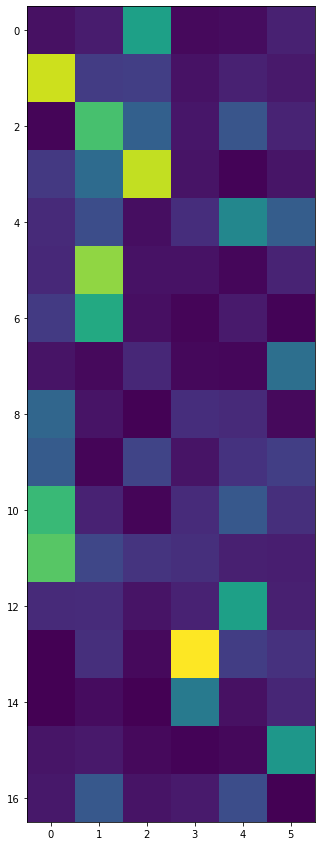

In [119]:
matplotlib.rcParams['figure.figsize']=[15,15]
plt.imshow(np.absolute(fa2_Fifa.loadings_))

Factor ตัวที่ 1 มีค่ามากอยู่ตรง ตัวแปรตัว 1 และ 10-12

Factor ตัวที่ 2 มีค่ามากอยู่ตรง ตัวแปรตัว 2-6

Factor ตัวที่ 3 มีค่ามากอยู่ตรง ตัวแปรตัว 0 และ 3

Factor ตัวที่ 4 มีค่ามากอยู่ตรง ตัวแปรตัว 13

Factor ตัวที่ 5 มีค่าไม่ค่อยมาก

Factor ตัวที่ 6 มีค่าไม่ค่อยมาก

### กราฟแท่ง

Exploratory

In [120]:
Fifa_data_dropped.columns

Index(['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target',
       'Off-Target', 'Blocked', 'Corners', 'Offsides', 'Free Kicks', 'Saves',
       'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)',
       'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red'],
      dtype='object')

<BarContainer object of 17 artists>

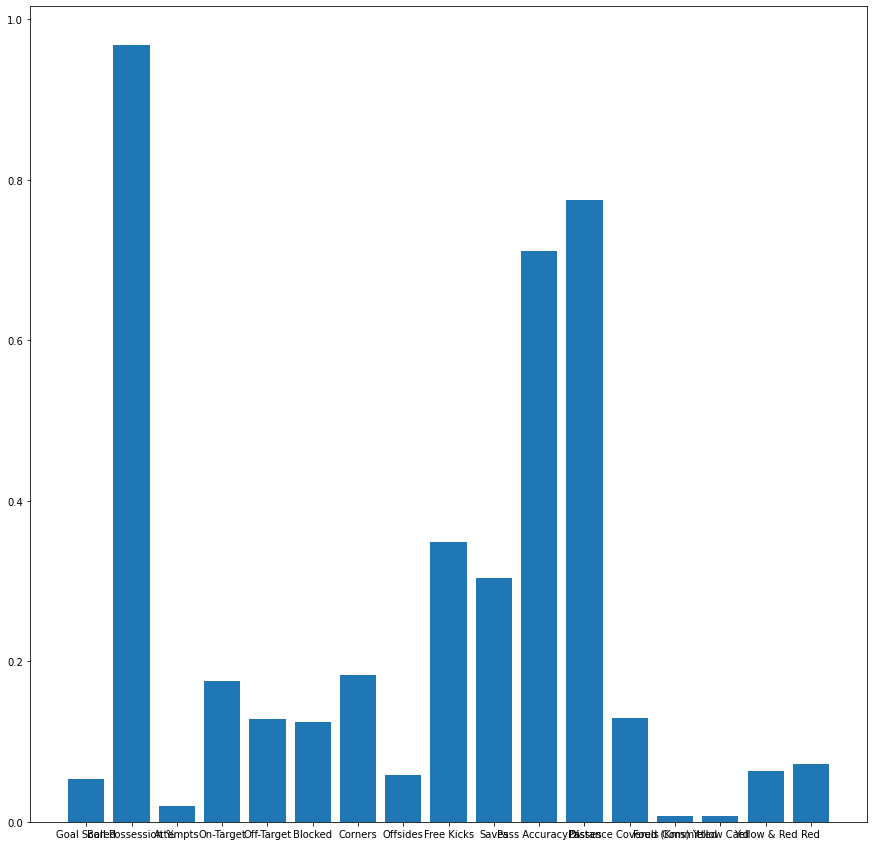

In [121]:
plt.bar(range(17),np.absolute(fa2_Fifa.loadings_[:,0]),tick_label=Fifa_data_dropped.columns)

พอร์ตเพื่อให้รู้ว่าตัวแปรไหนควรอยู่กลุ่มเดียวกันบ้าง หรือ ตัวแปรไหนควร อยู่ Factor เดียวกัน